# Layers of MLP

From mathematical point of view MLP is a smooth function $F$ which is constructed as a composition of some other functions

```{math}
:label: mlp-composition
F(\boldsymbol x) = (f_{L} \circ f_{L-1} \circ\ldots \circ f_2 \circ f_1)(\boldsymbol x),\quad
\boldsymbol x \in \mathbb R^{n_0}
```

Each function 

$$
    f_\ell \colon \mathbb R^{n_{\ell - 1}} \to \mathbb R^{n_\ell}
$$

performs transformation between **layer**: it converts representation of $(\ell-1)$-th layer 

$$
    \boldsymbol x_{\ell -1} \in \mathbb R^{n_{\ell - 1}} 
$$

to the representation of $\ell$-th layer 

$$
   \boldsymbol x_{\ell} \in \mathbb R^{n_{\ell}}.
$$

Thus, the **input layer** $\boldsymbol x_0 \in \mathbb R^{n_0}$ is converted to the **output layer** $\boldsymbol x_L \in \mathbb R^{n_L}$. All other layers $\boldsymbol x_\ell$, $1\leqslant \ell < L$, are called **hidden layers**.

```{figure} https://www.researchgate.net/publication/354817375/figure/fig2/AS:1071622807097344@1632506195651/Multi-layer-perceptron-MLP-NN-basic-Architecture.jpg
:align: center
```

```{warning}
The terminology about layers is a bit ambiguous. Both functions $f_\ell$ and their outputs $\boldsymbol x_\ell = f(\boldsymbol x_{\ell - 1})$ are called $\ell$-th layer in different sources.
```

## Linear regression

Linear regression is one the simplest MLPs. There are several types of linear regression model:

* simple linear regression {eq}`simple-lin-reg` $y = ax +b$
* {ref}`multiple linear regression <linear-regression>` $y = \boldsymbol x^\mathsf{T} \boldsymbol w + w_0$,

    $$
        \boldsymbol x = \begin{pmatrix} x_1 \\ \vdots \\ x_d \end{pmatrix}, \quad
        \boldsymbol w = \begin{pmatrix} w_1 \\ \vdots \\ w_d \end{pmatrix}
    $$
    
* multivariate linear regression $\boldsymbol y^\mathsf{T} = \boldsymbol x^\mathsf{T} \boldsymbol W + \boldsymbol b^\mathsf{T}$, $\boldsymbol W\in\mathbb R^{d \times m}$, $\boldsymbol y, \boldsymbol b \in \mathbb R^m$

```{admonition} Question
:class: important
How many layers does all these kinds of linear regression have? What are the sizes of input and output?
```

## Logistic regression

Logistic regression predicts probabilites of classes:

* {ref}`binary logistic regression <simple-log-reg>` $y = \sigma(\boldsymbol x^\mathsf{T} \boldsymbol w + w_0)$
* {ref}`multinomial logistic regression <multi-log-reg>` 

    $$
    \boldsymbol y^\mathsf{T} = \mathrm{Softmax}(\boldsymbol x^\mathsf{T} \boldsymbol W + \boldsymbol b^\mathsf{T}), \quad \boldsymbol W\in\mathbb R^{d \times K}, \quad \boldsymbol y, \boldsymbol b \in \mathbb R^K
    $$
    
```{admonition} Question
:class: important
How many layers does logistic regression have? What are the sizes of input and output?
```

## Parameters of MLP

However, one important element is missing in {eq}`mlp-composition`: parameters! Each layer $f_\ell$ has a vector of parameters $\boldsymbol \theta_\ell\in\mathbb R^{m_\ell}$ (sometimes empty). Hence, a layer should be defined as

$$
    f_\ell \colon \mathbb R^{n_{\ell - 1}} \times \mathbb R^{m_\ell} \to \mathbb R^{n_\ell}.
$$

The representation $\boldsymbol x_\ell$ is calculated from $\boldsymbol x_{\ell -1}$ by the formula 

$$
\boldsymbol x_\ell = f_\ell(\boldsymbol x_{\ell - 1},\boldsymbol \theta_\ell)
$$

with some fixed $\boldsymbol \theta_\ell\in\mathbb R^{m_\ell}$. The whole MLP $F$ depends on parameters of all layers:

$$
    F(\boldsymbol x, \boldsymbol \theta), \quad \boldsymbol \theta = (\boldsymbol \theta_1, \ldots, \boldsymbol \theta_L).
$$

All these parameters are trained simultaneously by the {ref}`backpropagation method <backprop>`.


## Dense layer

Edges between two consequetive layers denote **linear** (or **dense**) layer:

$$
    \boldsymbol x_\ell^{\mathsf T} = f(\boldsymbol x_{\ell - 1}; \boldsymbol W, \boldsymbol b) = \boldsymbol x_{\ell - 1}^{\mathsf T} \boldsymbol W + \boldsymbol b.
$$

The matrix $\boldsymbol W \in \mathbb R^{n_{\ell - 1}\times n_\ell}$ and vector $\boldsymbol b \in \mathbb R^{n_\ell}$ (bias) are parameters of the linear layer which defines the linear transformation from $\boldsymbol x_{\ell - 1}$ to $\boldsymbol x_{\ell}$.

**Q**. How many numeric parameters does such linear layer have?

```{admonition} Exercise
:class: important

Suppose that we apply one more dense layer:

$$
    \boldsymbol x_{\ell + 1} = \boldsymbol {W'x}_{\ell} + \boldsymbol{b'}
$$

Express $\boldsymbol x_{\ell + 1}$ as a function of $\boldsymbol x_{\ell - 1}$.
```

### Linear layer in PyTorch



In [15]:
import torch

x = torch.ones(3)
x

tensor([1., 1., 1.])

Weights:

In [19]:
linear_layer = torch.nn.Linear(3, 4, bias=False)
linear_layer.weight

Parameter containing:
tensor([[-0.4484,  0.5759, -0.3938],
        [-0.5506, -0.1603,  0.3134],
        [-0.2858, -0.0493, -0.0959],
        [-0.0627,  0.3831,  0.4740]], requires_grad=True)

Apply the linear transformation:

In [22]:
linear_layer(x)

tensor([-0.2664, -0.3975, -0.4310,  0.7944], grad_fn=<SqueezeBackward4>)

## Activation layer

In this layer a nonlinear **activation function** $\psi$ is applied element-wise to its input:

$$
    \psi(\boldsymbol x^{\mathsf T}) = \psi\big((x_1, \ldots, x_n)\big) = \big(\psi(x_1), \ldots, \psi(x_n)\big)  = \boldsymbol z^{\mathsf T}
$$

In the origial work by Rosenblatt the activation function was $\psi(t) = \mathbb I[t > 0]$. However, this function is discontinuous, that's why in modern neural networks some other smooth alternatives are used.

Sometimes linear and activation layers are combined into a single layer. Then each MLP layer looks like

$$
    \boldsymbol x_i^{\mathsf T} = \psi_i(\boldsymbol x_{i-1}^{\mathsf T} \boldsymbol W_{i} + \boldsymbol b_{i})
$$

where

* $\boldsymbol W_{i}$ is a matrix of the shape $n_{i-1}\times n_i$
* $\boldsymbol x_i, \boldsymbol b_i \in \mathbb R^{n_i}$ and $\boldsymbol x_{i-1} \in \mathbb R^{n_{i-1}}$
* $\psi_i(t)$ is an activation function which acts element-wise

### Activation functions

The most popular **activation functions** (**nonlinearities**):

* sigmoid: $\sigma(x) = \frac 1{1+e^{-x}}$
* hyperbolic tangent: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
* Rectified Linear Unit: 

$$
\mathrm{ReLU}(x) = x_+ = \max\{x, 0\}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import rc
from scipy.special import expit

rc('text', usetex=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')

font = {'family' : 'monospace',
        'size'   : 24,
        'weight' : 'heavy'
       }

rc('font', **font)

%config InlineBackend.figure_formats = ['svg']

def plot_activations(xmin, xmax, ymin, ymax):
    text_size = 24
    legend_size = 20
    eps=0.2
    fig, ax = plt.subplots(figsize=(11, 6))
    xs = np.linspace(xmin, xmax, num=500)
    
    
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

    ax.text(xmax + eps, -.2, r"$x$", size=text_size)
    ax.text(0.1, ymax, r"$y$", size=text_size)
    
    arrow_fmt = dict(markersize=6, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    
    ax.plot(xs, expit(xs), c='r', lw=3, label= r'$\sigma(x) = \frac{1}{1+e^{-x}}$')
    ax.plot(xs, np.tanh(xs), c='orange', lw=3, label= r'$\tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$')
    ax.plot(xs, np.maximum(0, xs), c='m', lw=3, label= r'$\mathrm{ReLU}(x) = x_+$')
    # plt.plot(xs, np.maximum(0.2*xs, xs), c='m', lw=3, label= r'$\mathrm{LReLU}(x)$')
    
    ax.plot([0, xmax], [1, 1], c='k', ls='--', lw=2)
    ax.plot([xmin, 0], [-1, -1], c='k', ls='--', lw=2)
    
    ax.text(-0.18, 0.05, r"0")
    
    ax.legend(fontsize=legend_size);
    ax.grid(ls=':')
    ax.set_xlim(xmin-eps, xmax+eps)
    ax.set_ylim(ymin - eps/2, ymax+eps/2)
    yticks = np.arange(ymin, ymax+1)
    xticks = np.arange(xmin, xmax+1)
    ax.set_yticks(yticks[yticks != 0]);
    ax.set_xticks(xticks[xticks != 0])
    ax.set_yticklabels(yticks[yticks != 0], size=legend_size)
    ax.set_xticklabels(xticks[xticks != 0], size=legend_size);

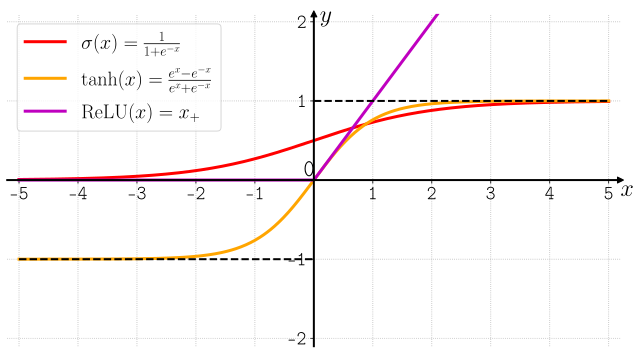

In [2]:
plot_activations(-5, 5, -2, 2)

You can read about advantages and disadvantages of different activation functions [here](https://education.yandex.ru/handbook/ml/article/beta-pervoe-znakomstvo-s-polnosvyaznymi-nejrosetyami#populyarnye-funkczii-aktivaczii).

### Activations in PyTorch

[Pytorch](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) library has a big zoo of activations.

In [19]:
from torch import nn, randn
X = randn(2, 5)
X

tensor([[-1.4296, -1.9962, -0.7670,  0.6045,  0.4553],
        [-0.5740,  0.2973,  0.7312,  0.4318,  0.1610]])

ReLU zeroes all negative inputs while Leaky ReLU — not:

In [20]:
nn.ReLU()(X), nn.LeakyReLU()(X)

(tensor([[0.0000, 0.0000, 0.0000, 0.6045, 0.4553],
         [0.0000, 0.2973, 0.7312, 0.4318, 0.1610]]),
 tensor([[-0.0143, -0.0200, -0.0077,  0.6045,  0.4553],
         [-0.0057,  0.2973,  0.7312,  0.4318,  0.1610]]))

```{admonition} ELU
:class: important

ELU activation function

$$
    \mathrm{ELU}(x) = \begin{cases} x,& x > 0 \\
    \alpha \frac{e^x - 1}x, & x \leqslant 0.
    \end{cases}
$$

has a hyperparameter $\alpha$. What is the main theoretical advantage of the default value $\alpha =1$?
```